# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics
sns.set()

In [5]:
x_values = [17,51,27,21,36,48,19,26,54,30]
y_values = [10,1,5,9,4,2,9,6,0,3]

In [15]:
student_data = pd.DataFrame({'Age': x_values, 'Tardies': y_values})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

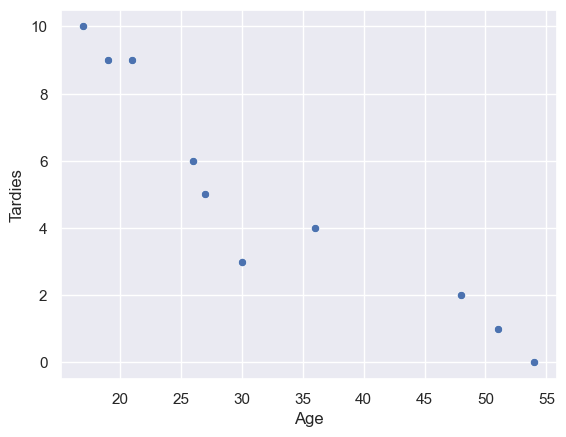

In [28]:
sns.scatterplot(data= student_data, x= 'Age', y= 'Tardies')
plt.xlabel("Age")
plt.ylabel('Tardies');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# the older you are, the less possible for you to go late to class.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [26]:
student_data.corr(), student_data.cov()


(              Age   Tardies
 Age      1.000000 -0.939163
 Tardies -0.939163  1.000000,
                 Age    Tardies
 Age      187.655556 -45.566667
 Tardies  -45.566667  12.544444)

In [27]:
'''
The 2 metrics shows the following: In the case of correaltion, there is a really strong negative correlation between both variables.
the older you are, the less probable you are to being late at classroom.

In the second case because covariance can give you a really long numbers, it is difficult to measure. Nevertheless in this case
there is a strong negative covariance that indicates that when one of the variable ingreases, the other degreases.

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [31]:
# it seems that the Age has a prediction power over being late. So x will be Age and being late will be y. So we will be using simple linear regression.
X= student_data.Age
X=X.values.reshape(-1,1)
y=student_data.Tardies
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
LR= LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

Plot your regression model on your scatter plot.

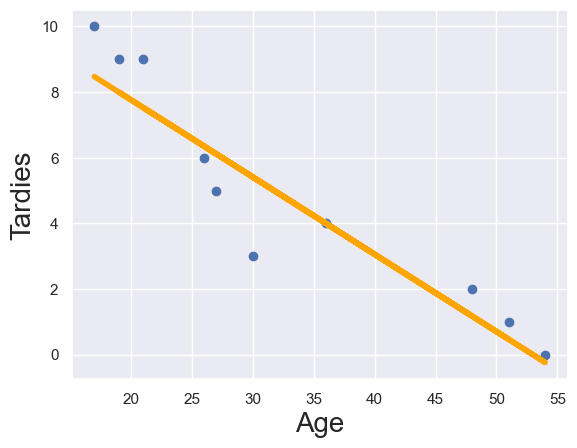

In [34]:

plt.scatter(X, y)
yhat= LR.coef_ *X+LR.intercept_
fig= plt.plot(X, yhat, lw=4, c='orange', label= 'regression line')
plt.xlabel('Age', fontsize=20)
plt.ylabel('Tardies', fontsize=20)
plt.show();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [35]:
'''
The model is quite accurate in this case. We can see it fits correctly in our model withot even making the test.
'''


'\nThe model is quite accurate in this case. We can see it fits correctly in our model withot even making the test.\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [40]:
vehicules= pd.read_csv('vehicles.csv')
vehicules.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [41]:
vehicules.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [48]:
X= vehicules[['Year', 'Cylinders','Fuel Type','Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
X1=vehicules[['Year', 'Cylinders','Fuel Type','Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
y= vehicules['CO2 Emission Grams/Mile']
corre_df= pd.DataFrame(data=X1)
corre_df

,Year,Cylinders,Fuel Type,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,Regular,19.388824,17,1950,522.764706
1,1984,6.0,Regular,25.354615,13,2550,683.615385
2,1985,4.0,Regular,20.600625,16,2100,555.437500
3,1985,6.0,Regular,25.354615,13,2550,683.615385
4,1987,6.0,Premium,20.600625,16,2550,555.437500
...,...,...,...,...,...,...,...
35947,2013,3.0,Premium,9.155833,36,1100,244.000000
35948,2014,3.0,Premium,9.155833,36,1100,243.000000
35949,2015,3.0,Premium,9.155833,36,1100,244.000000
35950,2016,3.0,Premium,9.155833,36,1100,246.000000


In [50]:
corre_df.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [51]:
corre_df.cov()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,101.713065,1.459896,-9.960687,10.556963,-469.934524,-266.928999
Cylinders,1.459896,3.080967,5.798763,-6.269421,692.437947,157.237699
Fuel Barrels/Year,-9.960687,5.798763,19.956615,-20.777227,2074.962381,524.532182
Combined MPG,10.556963,-6.269421,-20.777227,26.136725,-2268.286203,-563.783910
Fuel Cost/Year,-469.934524,692.437947,2074.962381,-2268.286203,257007.049913,56185.983710
CO2 Emission Grams/Mile,-266.928999,157.237699,524.532182,-563.783910,56185.983710,14175.467724


In [53]:
corre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     35952 non-null  int64  
 1   Cylinders                35952 non-null  float64
 2   Fuel Type                35952 non-null  object 
 3   Fuel Barrels/Year        35952 non-null  float64
 4   Combined MPG             35952 non-null  int64  
 5   Fuel Cost/Year           35952 non-null  int64  
 6   CO2 Emission Grams/Mile  35952 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.9+ MB


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [54]:
'''
Due to the fact we have several variables that are related to emissions of CO2, we will choose a multiple linear regression 
in this case, with x as fuel barrels and cylynders. we take out the fuel cost as it is correlated with fuel barrels.
'''
Xm= corre_df[['Cylinders', 'Fuel Barrels/Year']]
y= corre_df['CO2 Emission Grams/Mile']
X_train, X_test, y_train, y_test = train_test_split( Xm, y, test_size=0.2, random_state=4)
LRM= LinearRegression()
LRM.fit(X_train, y_train)
LRM_pre= LRM.predict(X_test)


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [55]:
import sklearn.metrics as skm
skm.accuracy_score(y_test, LRM_pre)

ValueError: continuous is not supported

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 